In [75]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
from augmentation import get_augmentations

class Args:
    aug = 'barlow'
    img_size = 224

barlow = get_augmentations(Args())


In [77]:
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import transforms

image_file_path = '/netscratch/saifullah/rvl-cdip-wo-tobacco3842/subset/email/correct/2064207242a.tif'
image = np.array(Image.open(image_file_path))
image = torch.tensor(image)

In [107]:
from das.data.transforms.grayscale_to_rgb import GrayScaleToRGB
import random
from PIL import Image, ImageOps, ImageFilter
import ocrodeg

class GaussianBlur(object):
    """Gaussian blur augmentation in SimCLR https://arxiv.org/abs/2002.05709"""

    def __init__(self, sigma=[.1, 2.]):
        self.sigma = sigma

    def __call__(self, x):
        sigma = random.uniform(self.sigma[0], self.sigma[1])
        x = x.filter(ImageFilter.GaussianBlur(radius=sigma))
        return x


class Solarization(object):
    def __init__(self, p):
        self.p = p

    def __call__(self, img):
        if random.random() < self.p:
            return ImageOps.solarize(img)
        else:
            return img




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
torch.Size([3, 297, 224])


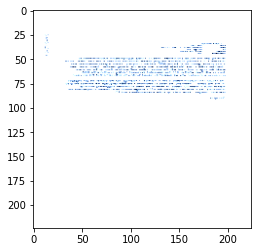

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


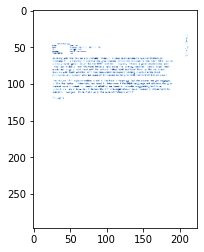

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
torch.Size([3, 297, 224])


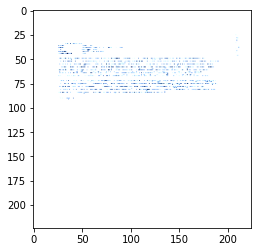

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


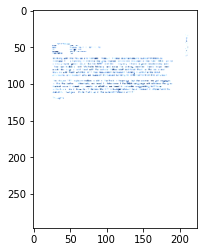

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
torch.Size([3, 297, 224])


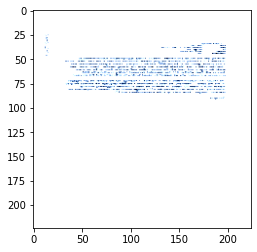

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


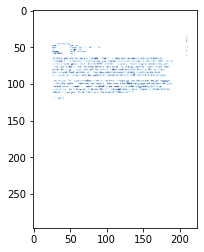

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
torch.Size([3, 297, 224])


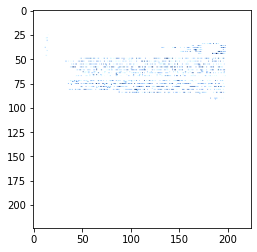

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


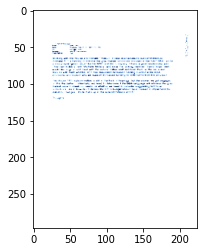

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
torch.Size([3, 297, 224])


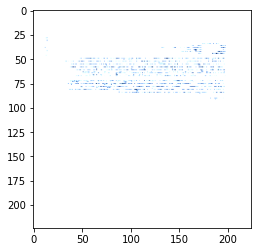

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


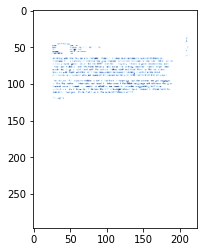

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
torch.Size([3, 297, 224])


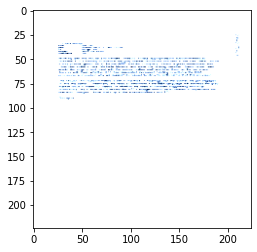

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


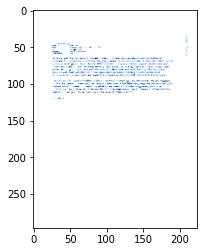

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
torch.Size([3, 297, 224])


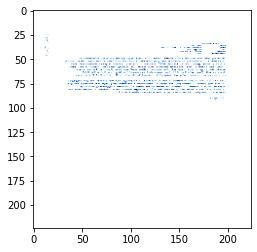

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


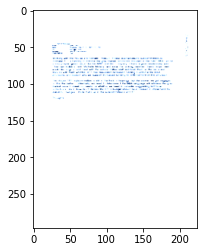

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
torch.Size([3, 297, 224])


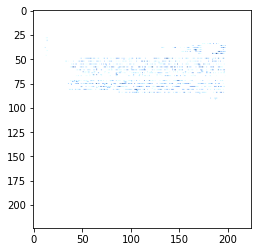

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


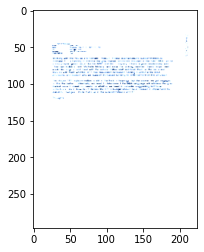

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
torch.Size([3, 297, 224])


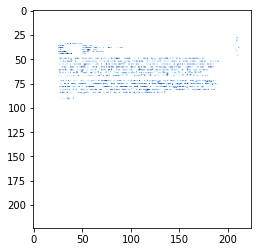

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


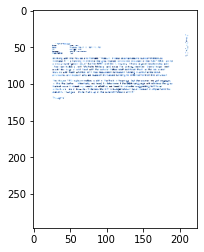

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
torch.Size([3, 297, 224])


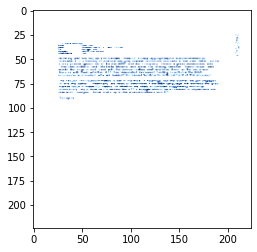

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


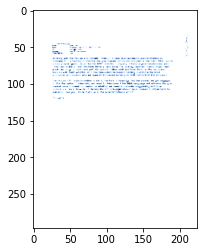

In [136]:
class DocumentAugmentations(object):
    def __init__(self, img_size):
        self.aug1 = transforms.Compose([
            GrayScaleToRGB(),
            transforms.ToPILImage(),
            transforms.Resize((img_size, img_size)),
            # transforms.RandomApply(
            #     [   
            #         transforms.RandomAffine((-5, 5))], 
            #     p=0.5
            # ),
            # transforms.RandomApply(
            #     [   
            #         transforms.RandomAffine(0, translate=(0.2, 0.2))], 
            #     p=0.5
            # ),
            # transforms.RandomApply(
            #     [   
            #         transforms.RandomAffine(0, scale=(0.8, 1.0))], 
            #     p=0.5
            # ),
            # transforms.RandomApply(
            #     [   
            #         transforms.RandomAffine(0, shear=(-5, 5))], 
            #     p=0.5
            # ),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomApply(
                [transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1)],
                p=0.8
            ),
            # # transforms.RandomGrayscale(p=0.2),
            transforms.RandomApply([GaussianBlur([.1, .5])], p=1.0),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        self.aug2 = transforms.Compose([
            GrayScaleToRGB(),
            transforms.ToPILImage(),
            transforms.Resize(img_size),
            # transforms.RandomApply(
            #     [   
            #         transforms.RandomAffine((-5, 5))], 
            #     p=0.5
            # ),
            # transforms.RandomApply(
            #     [   
            #         transforms.RandomAffine(0, translate=(0.2, 0.2))], 
            #     p=0.5
            # ),
            # transforms.RandomApply(
            #     [   
            #         transforms.RandomAffine(0, scale=(0.8, 1.0))], 
            #     p=0.5
            # ),
            # transforms.RandomApply(
            #     [   
            #         transforms.RandomAffine(0, shear=(-5, 5))], 
            #     p=0.5
            # ),

            # transforms.RandomHorizontalFlip(p=0.5),
            # transforms.RandomApply(
            #     [transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1)],
            #     p=0.8
            # ),
            # # transforms.RandomGrayscale(p=0.2),
            transforms.RandomApply([GaussianBlur([.1, .5])], p=1.0),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    def __call__(self, image):
        crops = []
        crops.append(self.aug1(image))
        crops.append(self.aug2(image))
        return crops
doc_augs = DocumentAugmentations(img_size=224)

for i in range(10):
    images = doc_augs(image)
    print(images[0].shape)
    print(images[1].shape)
    plt.imshow(images[0].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[1].permute(1, 2, 0))
    plt.show()